In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("Target.csv")

In [3]:
# Display the first few rows of the dataset
print(data.head())


         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [4]:
# Check for missing values
print(data.isnull().sum())


date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


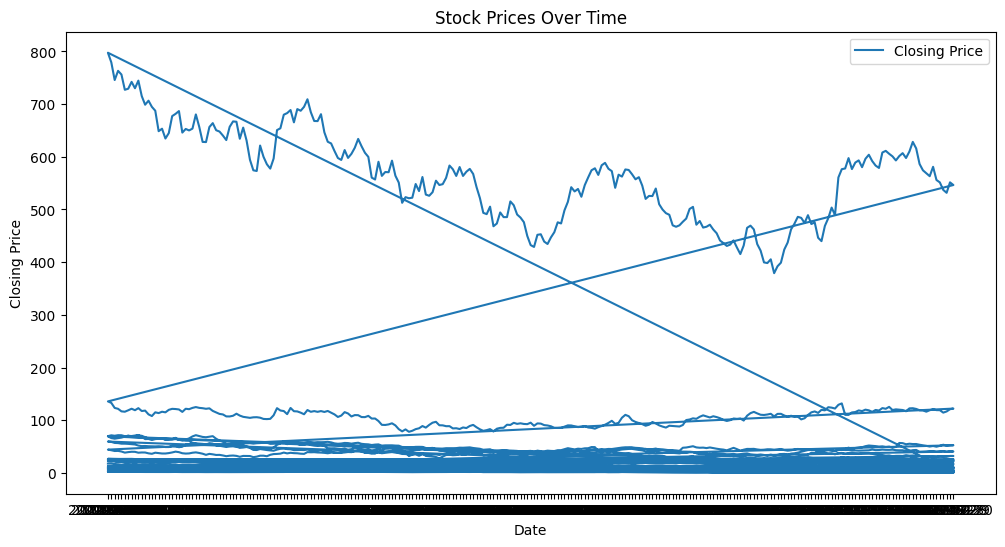

In [5]:
# Exploratory Data Analysis (EDA)
# Visualize key statistics and trends in stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['close'], label='Closing Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [6]:
# drop null values
data.dropna(inplace=True)

In [7]:
data.shape

(4204, 1285)

In [8]:
# Feature Engineering
# Add additional features like day, month, year from the Date column
data['date'] = pd.to_datetime(data['date'])  # Convert 'date' to datetime
data['Day'] = data['date'].dt.day
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year

In [9]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [10]:
# Feature Scaling
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['open', 'high', 'low', 'close', 'volume']])
scaled_test_data = scaler.transform(test_data[['open', 'high', 'low', 'close', 'volume']])


In [11]:
# Prepare input features and target variable for training
X_train, y_train = scaled_train_data[:, :-1], scaled_train_data[:, -1]
X_test, y_test = scaled_test_data[:, :-1], scaled_test_data[:, -1]


In [12]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Make predictions
lr_train_predictions = lr_model.predict(X_train)
lr_test_predictions = lr_model.predict(X_test)


In [14]:
# Evaluate the model
print('Linear Regression - Training MSE:', mean_squared_error(y_train, lr_train_predictions))
print('Linear Regression - Testing MSE:', mean_squared_error(y_test, lr_test_predictions))


Linear Regression - Training MSE: 0.0026144867876831323
Linear Regression - Testing MSE: 0.00307139833914803


In [15]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
# Make predictions
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)


In [17]:
# Evaluate the model
print('Random Forest - Training MSE:', mean_squared_error(y_train, rf_train_predictions))
print('Random Forest - Testing MSE:', mean_squared_error(y_test, rf_test_predictions))


Random Forest - Training MSE: 0.000256123876462973
Random Forest - Testing MSE: 0.004360647955071197


ValueError: operands could not be broadcast together with shapes (3363,4) (5,) (3363,4) 

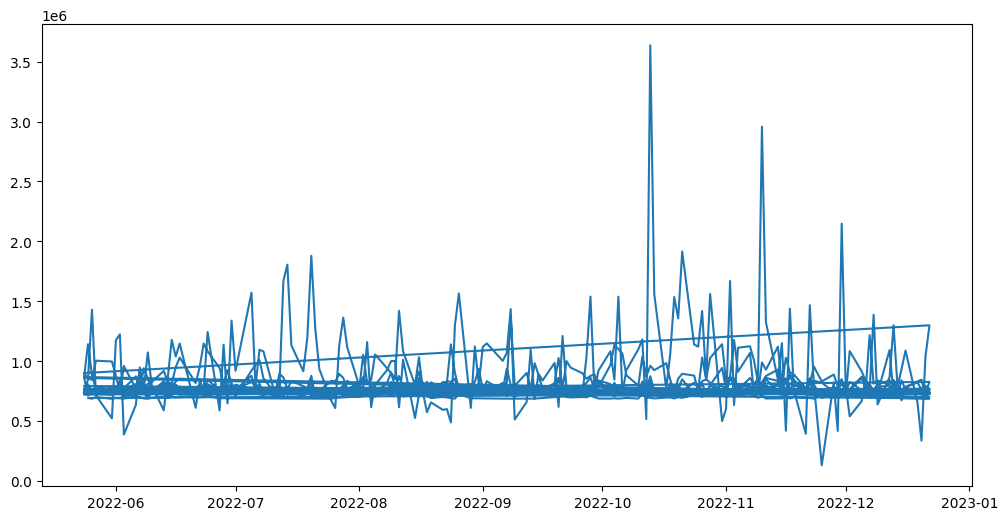

In [18]:
# Visualize Predictions
plt.figure(figsize=(12, 6))

# Inverse transform the scaled predictions and actual values
inverse_lr_train_predictions = scaler.inverse_transform(np.column_stack((X_train, lr_train_predictions)))
inverse_lr_test_predictions = scaler.inverse_transform(np.column_stack((X_test, lr_test_predictions)))

# Plot the actual and predicted values for the training set
plt.plot(train_data['date'], inverse_lr_train_predictions[:, -1], label='Predicted Train (LR)')
plt.plot(train_data['date'], scaler.inverse_transform(X_train)[:, -1], label='Actual Train')

# Plot the actual and predicted values for the testing set
plt.plot(test_data['date'], inverse_lr_test_predictions[:, -1], label='Predicted Test (LR)')
plt.plot(test_data['date'], scaler.inverse_transform(X_test)[:, -1], label='Actual Test')

plt.title('Linear Regression Model Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (3363,4) (5,) (3363,4) 

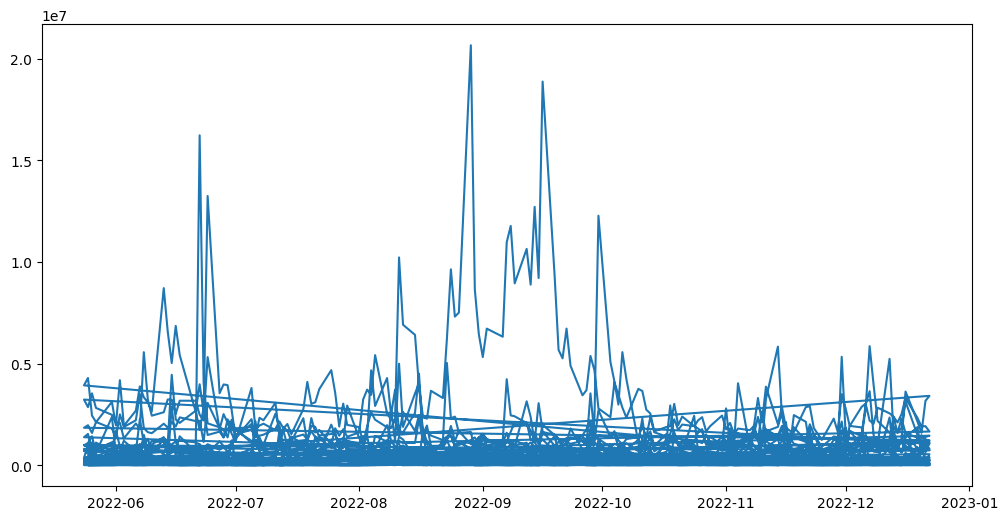

In [19]:
# Visualize Predictions for Random Forest
plt.figure(figsize=(12, 6))

# Inverse transform the scaled predictions and actual values
inverse_rf_train_predictions = scaler.inverse_transform(np.column_stack((X_train, rf_train_predictions)))
inverse_rf_test_predictions = scaler.inverse_transform(np.column_stack((X_test, rf_test_predictions)))

# Plot the actual and predicted values for the training set
plt.plot(train_data['date'], inverse_rf_train_predictions[:, -1], label='Predicted Train (RF)')
plt.plot(train_data['date'], scaler.inverse_transform(X_train)[:, -1], label='Actual Train')

# Plot the actual and predicted values for the testing set
plt.plot(test_data['date'], inverse_rf_test_predictions[:, -1], label='Predicted Test (RF)')
plt.plot(test_data['date'], scaler.inverse_transform(X_test)[:, -1], label='Actual Test')

plt.title('Random Forest Model Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
